## Naive Bayes Model

In [14]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Naive Bayes model
nb = GaussianNB()

# Train the model using the training data
nb.fit(X_train, y_train)

# Use the model to make predictions on the test data
nb_pred = nb.predict(X_test)

# Evaluate the model's performance
nb_accuracy = accuracy_score(nb_pred, y_test)                # Accuracy score
nb_report = classification_report(nb_pred, y_test)           # Precision, recall, F1-score
nb_matrix = confusion_matrix(nb_pred, y_test)                # Confusion matrix

# Print results
print('✅ Accuracy of Naive Bayes:', round(nb_accuracy, 3))
print('\n📋 Classification Report of Naive Bayes:\n', nb_report)

✅ Accuracy of Naive Bayes: 0.741

📋 Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.33      0.67      0.44      6242
           1       0.71      0.93      0.81     15166
           2       0.90      0.47      0.61     23288
           3       1.00      1.00      1.00     15317

    accuracy                           0.74     60013
   macro avg       0.73      0.77      0.71     60013
weighted avg       0.82      0.74      0.74     60013



## Confusion Matrix

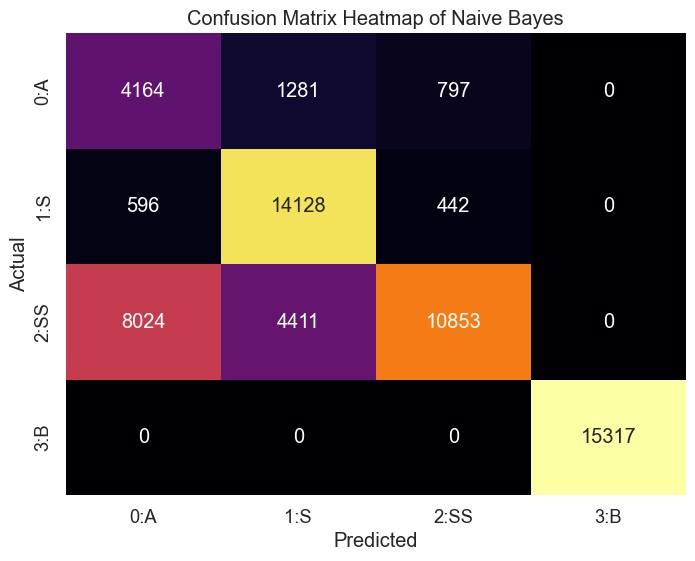

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))         # Set the size of the plot
sns.set(font_scale=1.2)            # Make text in the heatmap slightly larger

# Draw the heatmap
sns.heatmap(nb_matrix,             # The confusion matrix you calculated
            annot=True,            # Show numbers in the boxes
            fmt="d",               # Format numbers as integers
            cmap="inferno",        # Color style of the heatmap
            cbar=False,            # Don't show color bar
            xticklabels=["0:A", "1:S", "2:SS", "3:B"],  # Labels for predicted classes
            yticklabels=["0:A", "1:S", "2:SS", "3:B"])  # Labels for actual classes

# Add labels and title
plt.xlabel("Predicted")         
plt.ylabel("Actual")           
plt.title("Confusion Matrix Heatmap of Naive Bayes")

# Show the plot
plt.show()

In [17]:
# FP = Total predicted as a class but were actually something else
false_positives_per_class = nb_matrix.sum(axis=0) - np.diag(nb_matrix)
nb_tfp = false_positives_per_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives in Model:", nb_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 8620
  ➤ Class 1 (Label: S): 5692
  ➤ Class 2 (Label: SS): 1239
  ➤ Class 3 (Label: B): 0

❗ Total False Positives in Model: 15551


In [18]:
import joblib

# Save the model
joblib.dump(nb, 'Model/nb_model.pkl')

['Model/nb_model.pkl']